# Extração dos dados

O Myers Briggs Type Indicator(MBTI) é um sistema de tipologia de personalidade no qual há 16 tipos possiveis de personalidade vindos de 4 características cada uma com 2 possibilidade:


    Introversion (I) – Extroversion (E)
    Intuition (N) – Sensing (S)
    Thinking (T) – Feeling (F)
    Judging (J) – Perceiving (P)
    
Se por exemplo uma pessoa tiver as características introversão, intuição, pensamento e percepção era será do tipo INTP. Esse sistema de tipologia foi criado com base no trabalho de Carl Jung, trabalho este que foi usado para vários sistemas de tipologia sendo o mais famoso o MBTI.

O MBTI é alvo de diversas críticas sobre sua validade. Nesse trabalho espero notar se há realmente diferenças entre pessoas com base em seu resultado no MBTI contando a quantidade de palavras que a pessoa cita por sentença.

Esse banco de dados contém 8600 linhas a quais cada linha representa um usuário do PersonalityCafe forum, a primeira coluna contém o tipo de personalidade MBTI da pessoa e a segunda os ultimos 50 posts desse usuário. O dataset pode ser encontrado no kaggle


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mbtiDB=pd.read_csv("dados/mbti_1.csv")
mbtiDB.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [3]:
def CalcMeanWords(row):
    words=[]
    for post in row.split('|||'):
        words += post.split()
    return len(words)/50
def CalcVarianceWords(row):
    words=[]
    for post in row.split('|||'):
        words.append(len(post.split()))
    return np.var(words)
mbtiDB["num_words_per_post"] = mbtiDB["posts"].apply(CalcMeanWords)
mbtiDB['variance_of_word_counts'] = mbtiDB['posts'].apply(CalcVarianceWords)


In [4]:
mbtiDB.head()

,type,posts,num_words_per_post,variance_of_word_counts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,12.10,135.2900
1,ENTP,'I'm finding the lack of me in these posts ver...,24.38,187.4756
2,INTP,'Good one _____ https://www.youtube.com/wat...,17.70,180.6900
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",22.26,181.8324
4,ENTJ,'You're fired.|||That's another silly misconce...,20.32,196.4576


In [4]:
MediaPorTipo=mbtiDB.groupby('type').mean()
MediaTipos=mbtiDB.groupby('type').mean().mean()
VarTipos=mbtiDB.groupby('type').mean().var()
MediaPorTipo['num_words_per_post_normalized']=(MediaPorTipo['num_words_per_post']-\
                                    MediaTipos["num_words_per_post"])/np.sqrt(VarTipos["num_words_per_post"])
#MediaPorTipo['variance_of_word_counts_normalized']=(MediaPorTipo['variance_of_word_counts']-\
 #                                   MediaTipos["variance_of_word_counts"])/np.sqrt(VarTipos["variance_of_word_counts"])

In [5]:
MediaPorTipo.reset_index(inplace=True)

Normalizei as médias em torno de zero usando unidades de desvio padrão para que fique mais evidente as variações entre cada tipo.

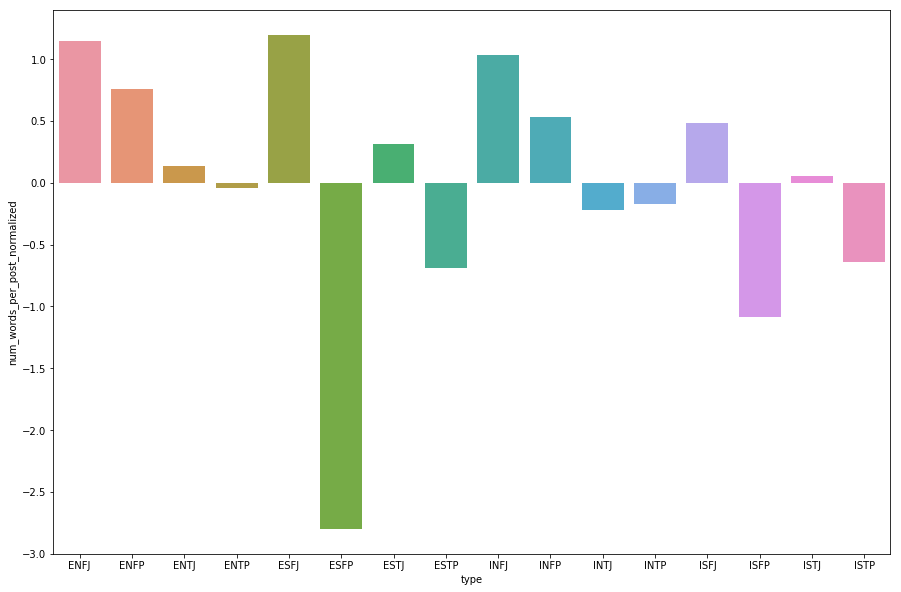

In [6]:
plt.figure(figsize=(15,10))
sns.barplot(x = "type", y = "num_words_per_post_normalized", data = MediaPorTipo)

## Agrupar por grupos

O site 16 personalites divide as 16 personalidades em 4 grupos. A dos analistas, dos diplomatas, dos sentinelas e dos exploradores. Irei analisar como fica esses grupos ressaltados nesse gráfico

In [7]:
Analistas = ["INTJ","INTP","ENTJ","ENTP"]
Diplomatas = ["INFJ","INFP","ENFJ","ENFP"]
Sentinelas = ["ISTJ","ISFJ","ESTJ","ESFJ"]
Exploradores = ["ESFP","ISTP","ISFP","ESTP"]
Ordem=Exploradores+Analistas+Sentinelas+Diplomatas
color=["brown"]*4+["green"]*4+["purple"]*4+["blue"]*4

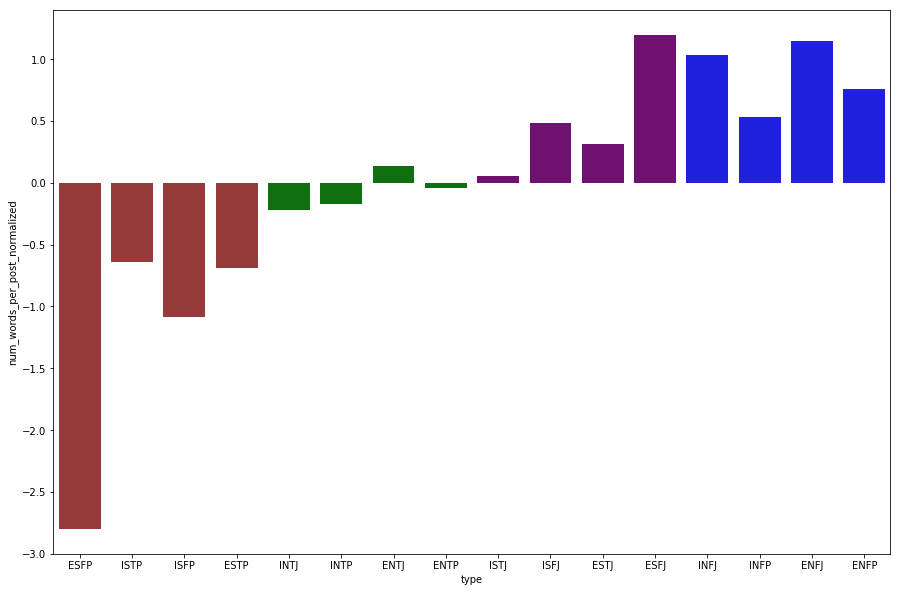

In [8]:
plt.figure(figsize=(15,10))
sns.barplot(x = "type", y = "num_words_per_post_normalized", data = MediaPorTipo,order = Ordem,palette = color)

Como pode se notar os exploradores estão ocupados explorando o mundo enquanto os diplomatas realmente são quem mais gosta de falar no fórum.

In [9]:
MediaPorTipo.set_index('type', inplace = True)
MediaPorTipo = MediaPorTipo.reindex(Ordem)
MediaPorTipo.reset_index(inplace = True)
DicionarioClasse = { "INTJ" : "Analistas", "INTP": "Analistas","ENTJ": "Analistas","ENTP" : "Analistas",
"INFJ": "Diplomatas", "INFP": "Diplomatas", "ENFJ": "Diplomatas", "ENFP": "Diplomatas",
"ISTJ": "Sentinelas","ISFJ": "Sentinelas", "ESTJ": "Sentinelas", "ESFJ": "Sentinelas",
"ESFP": "Exploradores", "ISTP": "Exploradores", "ISFP": "Exploradores", "ESTP": "Exploradores"}
MediaPorTipo["Classe"]=MediaPorTipo.apply(lambda x: DicionarioClasse[x["type"]],axis=1)
MediaPorTipo.rename(columns={'type': 'Tipo', 'num_words_per_post_normalized': 'Quantidade','num_words_per_post':'Quantidade de palavras' }, inplace=True)

In [10]:
MediaPorTipo.to_csv("dados/DadosParaGrafico.csv")